# Chunk 0
In this chunk, we explain how to use this file.

We have two different ways to check that $\chi_f(\mathfrak{L}_D(G_{13})) \le 3$. 

The first way uses built-in function from SageMath to compute $\chi_f(\mathfrak{L}_D(G_{13}))$ directly. To use this way, run Chunk 1, Chunk 2, Chunk 3, Chunk 4 sequentially.

The second way uses LP formulation of fractional chromatic number. We check that there exists a feasible point with value 3.
To use this way, make sure fractional_coloring.csv is in the same directory. Then, run Chunk 1, Chunk 2, Chunk 3, Chunk 5, Chunk 6 sequentially. 

Optional: Chunk 7 checks that the directed line graph is constructed directly. We also provide more examples of directed line graphs.

## Chunk 1
This chunk contains all functions and packages.

In [1]:
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from sage.graphs.graph_coloring import first_coloring 
import math
import networkx as nx
import matplotlib.pyplot as plt

# Generate correct vertex labels in the construction of directed line graph
# Input: Vertices e1 and e2. e1-e2 forms a directed 2-walk in the original graph
# Output: Vertex label used in the directed line graph of form "[e1,e2]"
def vertex_name(e1, e2):
    return "[" + str(e1) + "," + str(e2) + "]"


# Construct the directed line graph of a directed graph G
# Input: A directed graph G. 
#        It must be a directed graph. Otherwise, we will throw a ValueError and return None.
# Output: The directed line graph of G. 
#
# We note that chi_f(K4) = 4, chi_f(L_D(K4)) = 3 by numerical calculation. 
# This implies that there is a difference between the fractional chromatic number of an undirected  
# graph and the fractional chromatic number of its directed line graph (viewing each undirected edge 
# as two opposite directed edge).
def directed_line_graph(G): 
    try:
        if not G.is_directed():
            raise ValueError()
    except ValueError:
        print("ValueError: G must be directed. Returning None.")
        return None
    E = G.edges() 
    adjacency_list = {}
    for e1, e2, v in E:
        neighbor = []
        for e3, e4, u in E:
            if not (str(e1) == str(e3) and str(e2) == str(e4)) and (str(e1) == str(e4) or str(e2) == str(e3)):
                neighbor.append(vertex_name(e3,e4))
            
        adjacency_list[vertex_name(e1,e2)] = neighbor
    G = Graph(adjacency_list)
    return G

# Calculate and return the dot product of two vectors a and b.
def dot_product(a, b):
    return sum(x*y for x, y in zip(a, b))

# Determine if two vectors are orthogonal, considering a numerical error threshold epsilon.
def is_orthogonal(a, b, epsilon=1e-10):
    return abs(dot_product(a, b)) < epsilon


# Convert a vector to its string representation.
def vector_to_str(vector):
    return str(vector)

# Find all orthogonal pairs of vectors in the input and return a dictionary of these pairs
# Input: A list of vectors
# Output: A dictionary, the key is each vector in the input. 
#         The value of each key is a list containing all vectors orthogonal to the key.
def find_orthogonal_vectors(vectors, epsilon=1e-10):
    orthogonal_vectors = {}  # Initialize the dictionary to store the result
    
    # Iterate over each vector in the input list
    for i, v_i in enumerate(vectors):
        orthogonal_list = []  # List to store vectors orthogonal to v_i
        
        # Check orthogonality with every other vector, considering epsilon
        for j, v_j in enumerate(vectors):
            if i != j and is_orthogonal(v_i, v_j, epsilon):  # If orthogonal within epsilon
                orthogonal_list.append(vector_to_str(v_j))  # Add to the list of orthogonal vectors
        
        # Map the current vector to its list of orthogonal vectors
        orthogonal_vectors[vector_to_str(v_i)] = orthogonal_list
    
    # Convert tuples back to lists for the final output
    return orthogonal_vectors 




# Determine if the fractional coloring is exactly 3 and all constraint are satisfied without numerical error.
# We use integer arithmetic to avoid the numerical error.
# Input: vertices: the vertex set  
#        denominator: The denominator explained in the end of Chunk 5
#        enumerators: The enumerators explained in the end of Chunk 5
#
# Output: False if some constraint is violated or the value is not exactly 3
#         True if it passes all checking.
def check(vertices, enumerators, denominator):
    succ = True
    
    #This loop checks that Mx >= 1 is true, by checking each row is satisfied.
    for v in vertices:
        val = int(0) 
        for row in enumerators:
            # sum up all X_I s.t. v is in the set I 
            if v in row["ind_set"]:
                val = val + int(row["weight"])
                
        # If the value is less than k, one constraint is violated.        
        if val < denominator:
            print("A constraint is not satisfied:")
            print(v)
            print(val)
            succ = False
            break
    val = int(0)
    for row in enumerators:
        val = val + int(row["weight"]) 
    for v in vertices:
        val = val
    if val != int(3 * denominator):
        print("The value is not exact:")
        print("3 * denominator: ", int(3 * denominator) )
        print("sum: ",val)
        succ = False 
    return succ

## Chunk 2
This chunk creates the directed version of the graph $G_{13}$, i.e. each undirected edge becomes two opposite directed edge.

The graph is plotted below using networkx. 

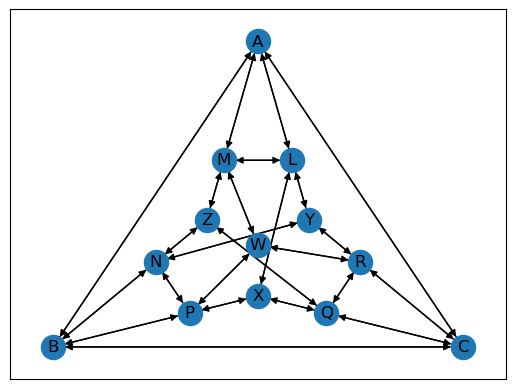

In [2]:
vectors = [
    [1, 0, 0],  #A
    [0, 1, 0],  #B
    [0, 0, 1],  #C
    [0, 1, -1], #M
    [0, 1, 1],  #L
    [1, 0, -1], #P
    [1, 0, 1],  #N
    [1, -1, 0], #R
    [1, 1, 0],  #Q
    [1, 1, 1],  #W
    [1, 1, -1], #Y
    [1, -1, 1], #X
    [-1, 1, 1]  #Z
]

orthogonal_dict = find_orthogonal_vectors(vectors)
G = DiGraph(orthogonal_dict)
G.vertices(sort=True)
labels = list(["Z","C","M","B","L","R","X","P","A","N","Y","Q","W"]) 

G.relabel(perm=labels) 
G.vertices(sort=True)

 
networkx_G = G.networkx_graph() 
scale = 24
pos_dict = {
    'W' : (0*scale, 0*scale),
    'X' : (0*scale, -1 *scale),
    'Y' : (math.sqrt(3)*scale/2, 1/2*scale),
    'Z' : (-math.sqrt(3)*scale/2, 1/2*scale), 
    'M' : (-math.sqrt(3)*scale/3, 5/3 *scale),
    'L' : (math.sqrt(3)*scale/3, 5/3 *scale),
    'N' : (-math.sqrt(3)*scale, -1/3 *scale),
    'P' : (-2*math.sqrt(3)*scale/3, -4/3 *scale),
    'R' : (math.sqrt(3)*scale, -1/3*scale),
    'Q' : (2*math.sqrt(3)*scale/3, -4/3 *scale),
    'A' : (0*scale, 4 * scale),
    'B' : (-2*math.sqrt(3)*scale, -2 *scale),
    'C' : (2*math.sqrt(3)*scale, -2 *scale),
}
nx.draw_networkx(networkx_G, pos_dict, arrowstyle="<|-")
plt.show() 

## Chunk 3

This chunk creates $\mathfrak{L}_D(G_{13})$.

The graph is plotted. Since we don't know a good way to draw a line graph, we plot it using the built-in method from SageMath.

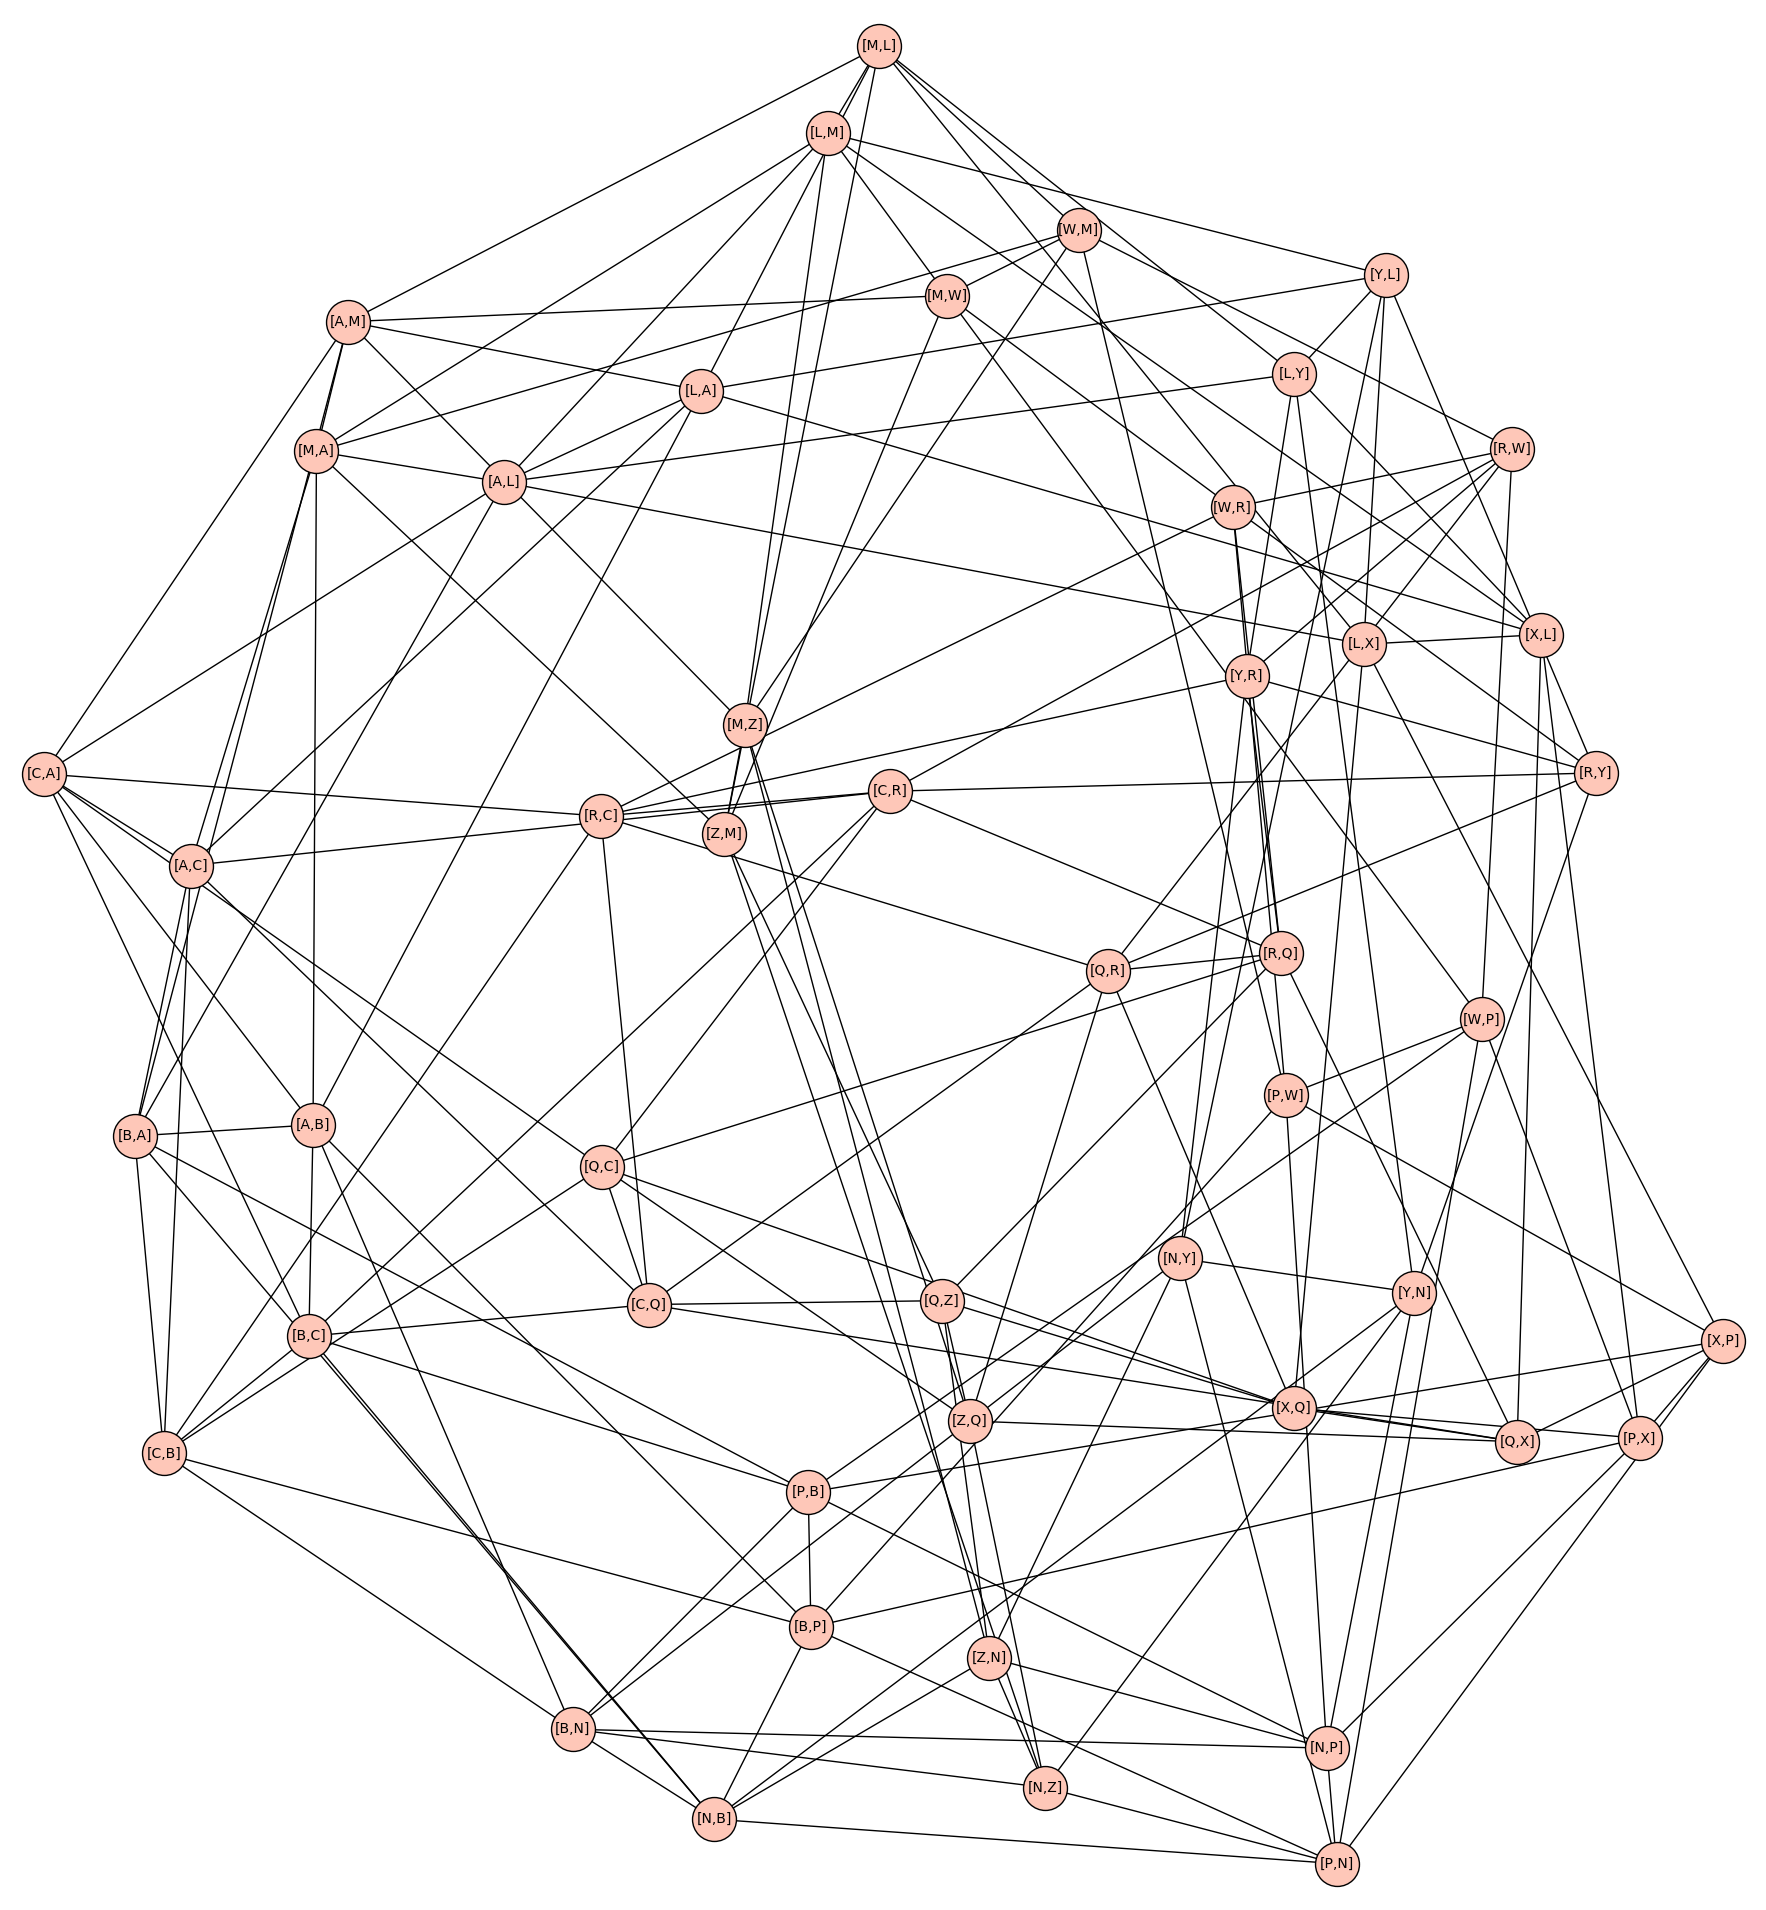

In [3]:
H =  directed_line_graph(G);
vertices = H.vertices(sort=True)
H.plot(vertex_size=1000).show(figsize=[25.6,19.2]) 

## Chunk 4

In this chunk, we calculate $\chi(\mathfrak{L}_D(G_{13}))$ and $\chi_f(\mathfrak{L}_D(G_{13}))$ using built-in methods from SageMath.

It may take around 2 min to run.

In [4]:
print("The chromatic number of directed line graph of G13 is", H.chromatic_number())
print("The fractional chromatic number of directed line graph of G13 is", H.fractional_chromatic_number())

The chromatic number of directed line graph of G13 is 4
The fractional chromatic number of directed line graph of G13 is 3


## Chunk 5

The LP formulation of the fractional chromatic number is the following
\begin{align*}
    \min& \sum x_{I}\\
    \text{ such that  }& \forall v\in V, \sum_{I\in \mathcal{I}, v\in I} x_I \ge 1,\\
    & \forall I\in \mathcal{I}, x_I \ge 0.
\end{align*} 
In this chunk, we present a feasible point such that the value of the objective function is 3.  

We checked that the $I$ in each $X_I$ is a independent set in $\mathfrak{L}_D(G_{13})$ using the built-in method from SageMath.

In [5]:
import csv 
enumerators = [] 
with open('fractional_coloring.csv', mode='r', newline='') as file:
    # Create a CSV reader object
    csv_reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV
    for row in csv_reader:
        ith_dict = {}
        ith_dict["ind_set"] = row["ind_set"]
        ith_dict["weight"] = int(row["weight"])
        enumerators.append(ith_dict)  
        
# It should be 499 * 28 = 13972
denominator = int(0) 
for element in enumerators:
    denominator = denominator + int(element["weight"])
denominator = denominator // 3
for element in enumerators:
    print("The set I of this iteration is",element["ind_set"])
    print("I is independent:", H.is_independent_set(vertices=element["ind_set"]))
    print("X_I is " + str(element["weight"]) + "/" + str(denominator) + "\n")  

The set I of this iteration is ['[A,B]', '[A,L]', '[A,M]', '[C,B]', '[C,Q]', '[C,R]', '[N,B]', '[N,P]', '[W,M]', '[W,P]', '[W,R]', '[X,L]', '[X,P]', '[X,Q]', '[Y,L]', '[Y,R]', '[Z,M]', '[Z,Q]']
I is independent: True
X_I is 2794/13972

The set I of this iteration is ['[A,B]', '[A,L]', '[C,B]', '[C,Q]', '[M,L]', '[M,W]', '[M,Z]', '[N,B]', '[N,P]', '[N,Y]', '[N,Z]', '[R,Q]', '[R,W]', '[R,Y]', '[X,L]', '[X,P]', '[X,Q]']
I is independent: True
X_I is 2346/13972

The set I of this iteration is ['[B,A]', '[B,P]', '[C,A]', '[C,Q]', '[L,A]', '[L,X]', '[L,Y]', '[M,A]', '[N,P]', '[N,Y]', '[R,Q]', '[R,Y]', '[W,P]', '[Z,Q]']
I is independent: True
X_I is 93/13972

The set I of this iteration is ['[B,A]', '[B,N]', '[C,A]', '[C,Q]', '[C,R]', '[L,A]', '[L,X]', '[M,A]', '[M,W]', '[M,Z]', '[P,N]', '[P,W]', '[P,X]', '[Y,N]', '[Y,R]']
I is independent: True
X_I is 1999/13972

The set I of this iteration is ['[C,A]', '[C,B]', '[C,Q]', '[L,A]', '[L,Y]', '[M,A]', '[M,W]', '[M,Z]', '[N,B]', '[N,Y]', '[N,Z]',

We will perform integer arithmetic to avoid any numerical error from float-point arithmetic.  

Denote $(X_I)_{I\in \mathcal{I}}$ the feasible point in the fractional coloring. Here, we explain the data structure of $(X_I)_{I\in \mathcal{I}}$ such that integer arithmetic can be performed.

We decompose $(X_I)_{I\in \mathcal{I}}$ into two parts, enumertors and denominator. 

The denominator is just the common denominator of each $X_I$, i.e. the number 13972. Its data type is integer.

The enumerators is a list such that each element is  a dictionary with exactly two keys: "ind_set" and "weight".

"ind_set" is a independent of of the graph.
"weight" is the enumerator of $X_I$ associated with the denominator 13972.

Only $I\in \mathcal{I}$ such that $X_I\ne 0$ will appear in the enumerators as cardinality of $\mathcal{I}$ can be exponentially large.

Given denominator and enumerators, each $X_I$ can be recovered as follows.   For each independent set $I$, if there is an element in enumerators such that $\text{element['ind_set'] = I}$, then we set $X_I = \dfrac{\text{element["weight"]}}{ \text{denominator}}$. Otherwise, $X_I=0$.

We printed all such $X_I$ in the above cell. We checked they are all$\ge 0$.

The first three elements of enumerators is as follows:
        
                [{'ind_set': "['[A,B]', '[A,L]', '[A,M]', '[C,B]', '[C,Q]', '[C,R]', '[N,B]', 
                               '[N,P]', '[W,M]', '[W,P]', '[W,R]', '[X,L]', '[X,P]', '[X,Q]', 
                               '[Y,L]', '[Y,R]', '[Z,M]', '[Z,Q]']", 'weight': 2794}, 
                 {'ind_set': "['[A,B]', '[A,L]', '[C,B]', '[C,Q]', '[M,L]', '[M,W]', '[M,Z]', 
                               '[N,B]', '[N,P]', '[N,Y]', '[N,Z]', '[R,Q]', '[R,W]', '[R,Y]', 
                               '[X,L]', '[X,P]', '[X,Q]']", 'weight': 2346}, 
                 {'ind_set': "['[B,A]', '[B,P]', '[C,A]', '[C,Q]', '[L,A]', '[L,X]', '[L,Y]', 
                  '[M,A]', '[N,P]', '[N,Y]', '[R,Q]', '[R,Y]', '[W,P]', '[Z,Q]']", 'weight': 93},
                  ...]
                  
The denominator the sum of $\text{'weight'}$ of all elements. The sum is 13972.

## Chunk 6

We already check that each set printed   is indpendent and explained that $X_I \ge 0$ for all $I\in \mathcal{I}$ in the Chunk 5. 

We just need to check that 
 
- $\forall v\in V, \sum_{I\in \mathcal{I}, v\in I} x_I \ge 1$ holds.
- The ojective function has value 3. 

We do it in this chunk, which shows this is a feasible point of the LP with value 3. 

The check function performs integer arithmetic, so we do not have numerical error from the float-point arithmetic.

In [6]:
result = check(vertices, enumerators, denominator)
if result == True:
    print("The fractional coloring has value exactly 3 and all constraint are satisfied.")
else:
    print("The fractional coloring either does not have value exactly 3 or some constraints are not satisfied.")

The fractional coloring has value exactly 3 and all constraint are satisfied.


## Chunk 7
This chunk verifies that function directed_line_graph(G) is correctly performed and gives more example.

Checking directed_line_graph(G) correctly throw error if the graph is undirected.

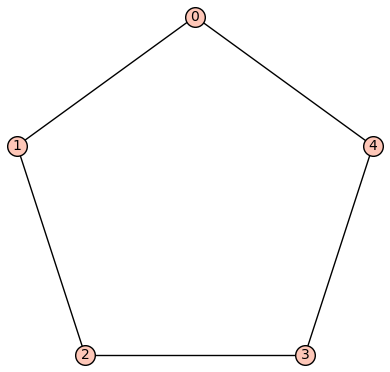

ValueError: G must be directed. Returning None.


In [7]:
G = graphs.CycleGraph(5) 
G.show()
directed_line_graph(G)

Here we give an example of how a directed line graph is genereated correctly.

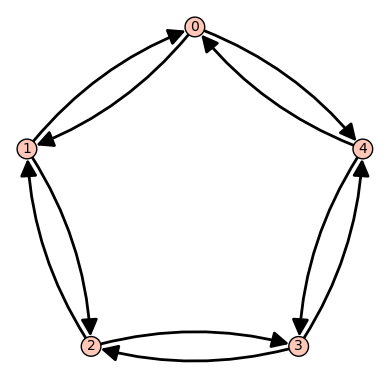

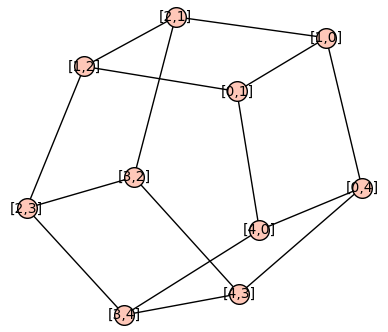

In [8]:
G = graphs.CycleGraph(5).to_directed()
G.show()
H = directed_line_graph(G)
H.show()

Next, we consider $K_4$. We have that $\chi_f(4) =  4$, but $\chi_f(\mathfrak{L}_D(K_4))=3$. These fractional chromatic number are calculated by built-in method in SageMath.

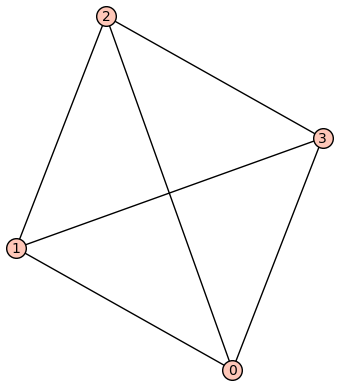

Fractional chromatic number of K4 as an undirected graph is 4


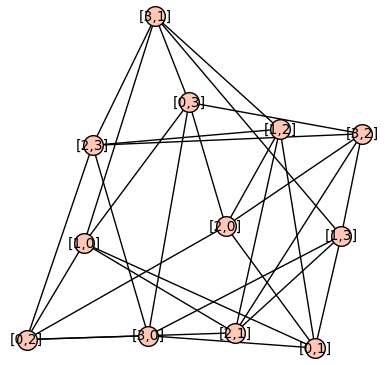

Fractional chromatic number of directed line graph of K4 is 3


In [9]:
# A correct example of how a directed line graph is genereated.
A = matrix(
    [
        [0,1,1,1],
        [1,0,1,1],
        [1,1,0,1],
        [1,1,1,0]
    ]
)
K4 = Graph(A)
K4.show() 
print("Fractional chromatic number of K4 as an undirected graph is", K4.fractional_chromatic_number())
G = Graph(A).to_directed() 
H = directed_line_graph(G)
H.show() 
print("Fractional chromatic number of directed line graph of K4 is", H.fractional_chromatic_number())